In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from matplotlib.ticker import LinearLocator

# Data id:14--28--14  

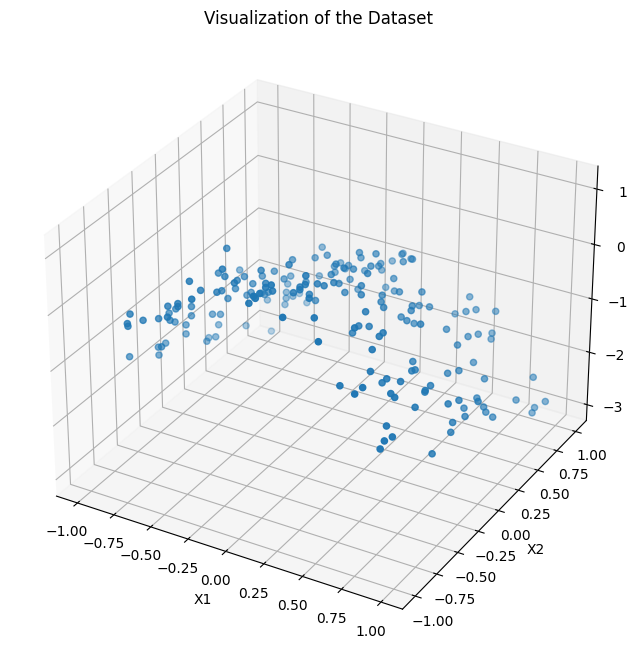

In [14]:
# Load the data
file = open("week3.txt", "r")
data = [line.strip() for line in file.readlines()]
data = [line.split(",") for line in data]

# Convert to numpy array
data = np.array(data).astype(float)

# Capture the Xs and ys
X = data[:, :2]
y = data[:, 2]

# Plot the graph
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111 , projection ='3d')
ax.scatter(X[:, 0], X[:, 1], y)
ax.set_title("Visualization of the Dataset")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
plt.show()

C is 0.1 [ 0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0.]
C is 1 [ 0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0.]
C is 5 [ 0.         -0.         -0.6803929  -0.93108058 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.        ]
C is 10 [ 0.         -0.         -0.86594124 -1.50202448 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.        ]
C is 100 [ 0.          0.         -1.0327641  -2.01518063  0.         -0.
  0.         -0.         -0.         -0.         -0.          0.
 -0.          0.         -0.01732189  0.         -0.         -0.
 -0.         -0.         -0.        ]
C is 500 [ 0.         -0.01588659 -1.04777666 -2.06265978 -0.00801926 -0.
  0.         

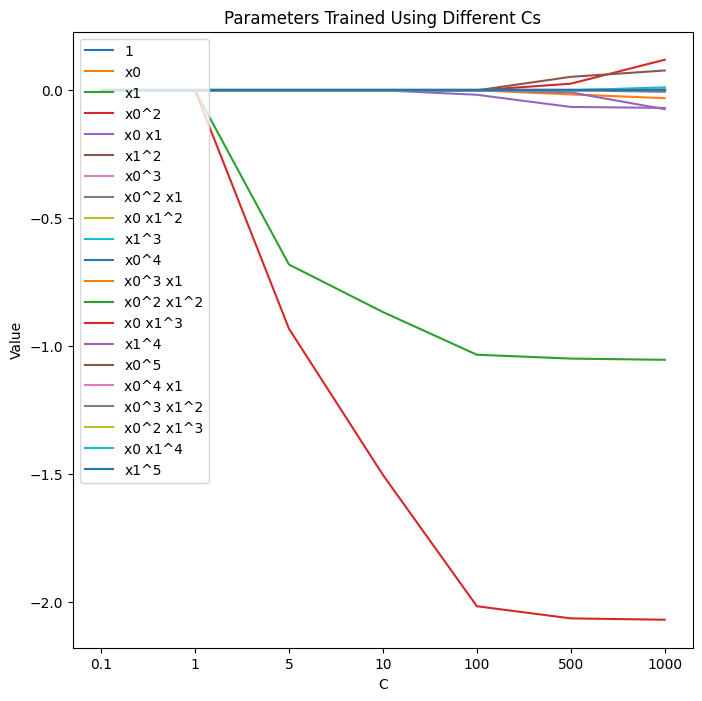

In [15]:
# Create new features
poly = PolynomialFeatures(5)
poly_X = poly.fit_transform(X)
names = poly.get_feature_names_out()

# Train a list of models
parameters = []
c_list = [0.1, 1, 5, 10, 100, 500, 1000]
for c in c_list:
    # Transfer C to alpha
    alpha = 1/(2*c)
    clf = linear_model.Lasso(random_state=0, alpha=alpha)
    clf.fit(poly_X, y)
    parameters.append(clf.coef_)
    print("C is", c ,clf.coef_)
    
parameters = np.array(parameters).T

# Visualization
plt.figure(figsize=[8, 8])
plt.title("Parameters Trained Using Different Cs")
for i in range(len(parameters)):
    plt.plot(np.arange(len(c_list)), parameters[i], label=names[i])
plt.xlabel("C")
plt.xticks(np.arange(len(c_list)), c_list)
plt.ylabel("Value")
plt.legend(loc='upper left')
plt.show()

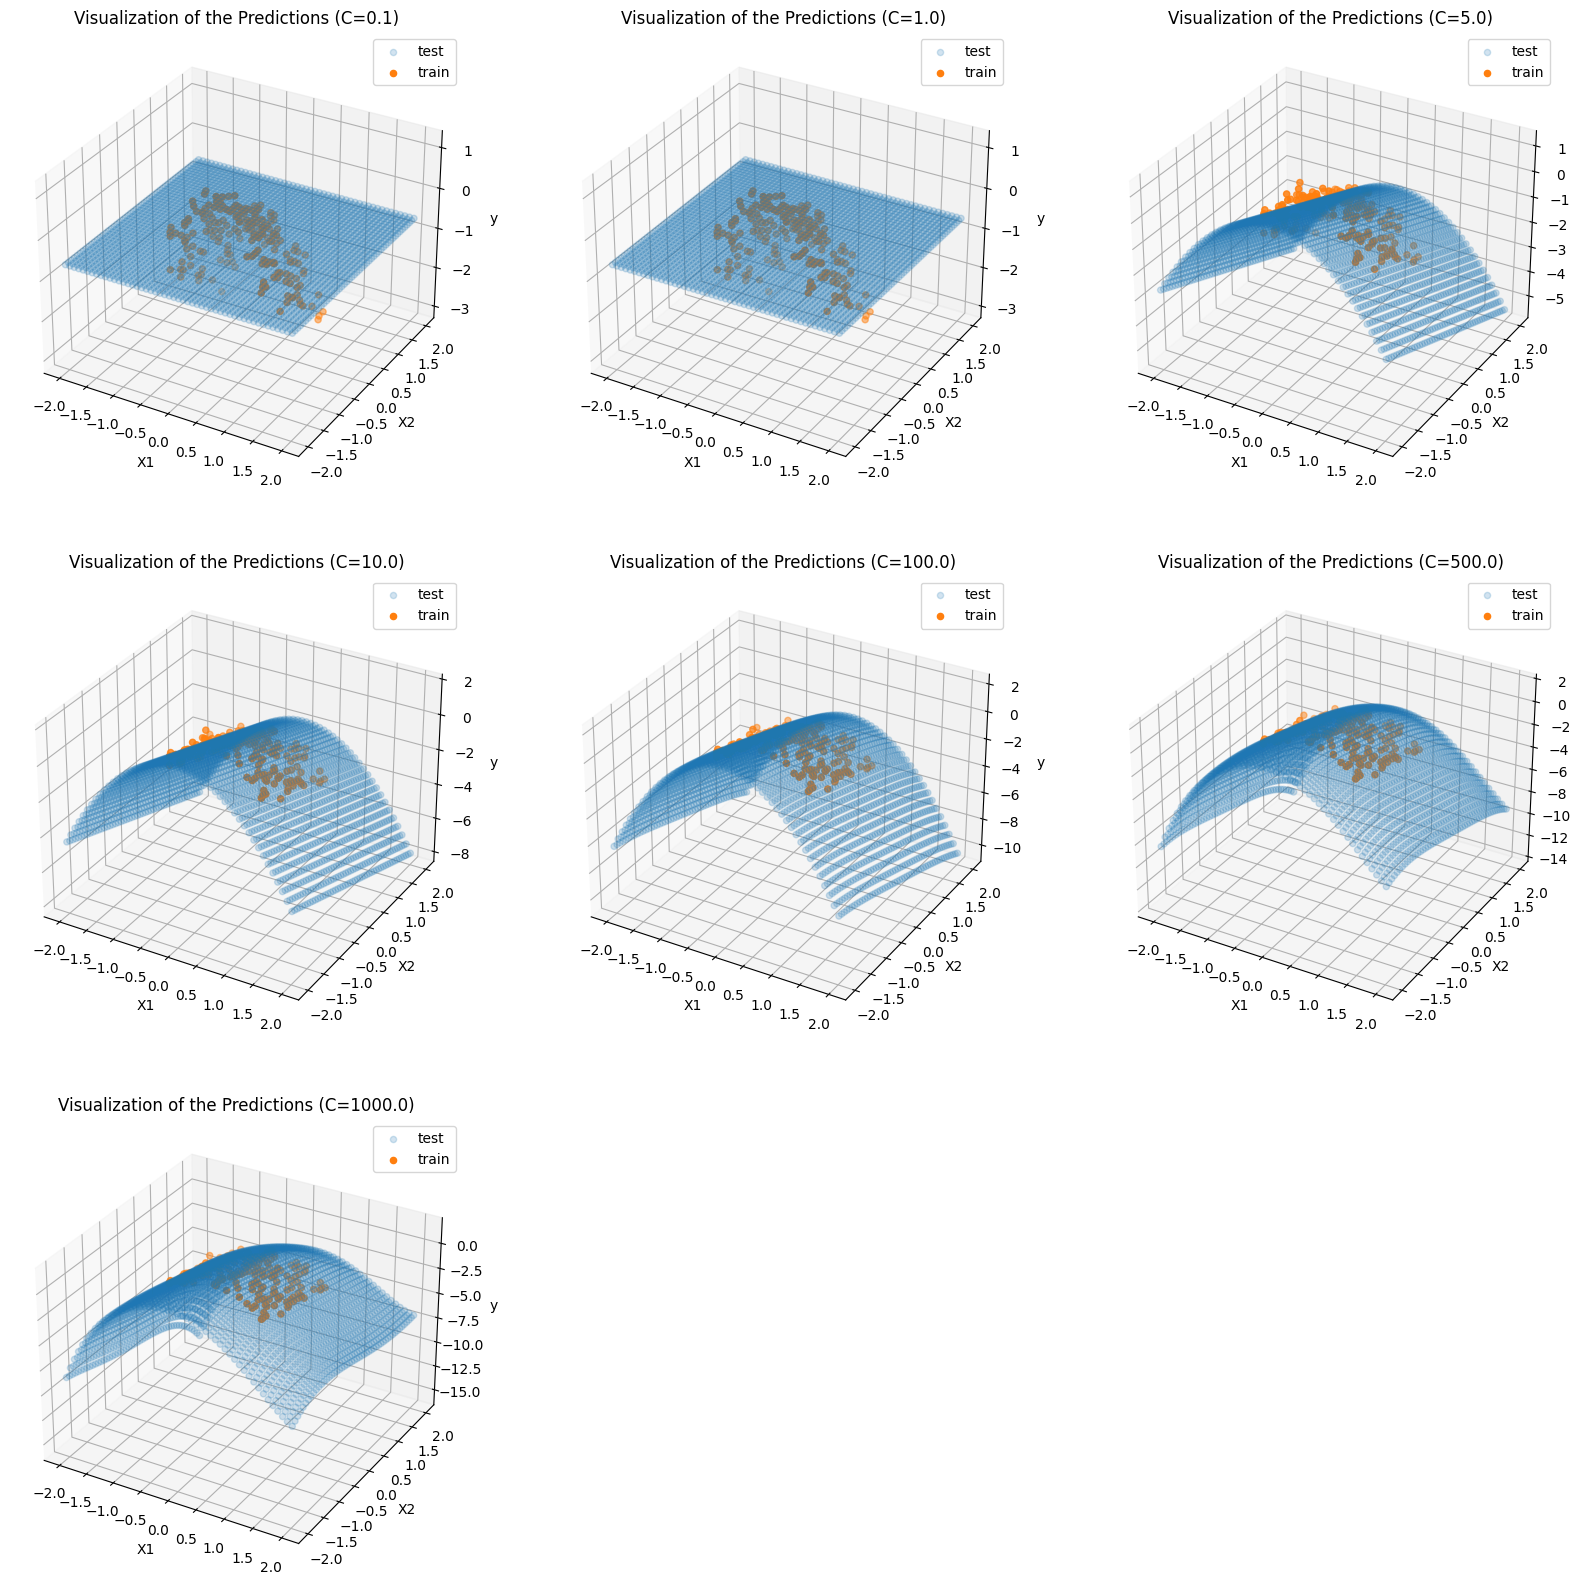

In [16]:
# Generate a grid
Xtest =[ ]
grid =np.linspace(-2, 2)
for i in grid:
    for j in grid:
        Xtest.append([i, j])
Xtest = np.array(Xtest)

# Generate the polynomial features
poly_Xtest = poly.fit_transform(Xtest)

# Train a list of models and make predictions
c_list = [0.1, 1, 5, 10, 100, 500, 1000]
predictions = []
for c in c_list:
    # Transfer C to alpha
    alpha = 1/(2*c)
    clf = linear_model.Lasso(random_state=0, alpha=alpha)
    clf.fit(poly_X, y)
    predictions.append(clf.predict(poly_Xtest))

# Generate the graphs
fig = plt.figure(figsize=[20, 20])
for i in range(len(c_list)):
    ax = fig.add_subplot(3, 3, i+1, projection ='3d')
    # Predictions
    ax.scatter(Xtest[:, 0], Xtest[:, 1], predictions[i], alpha=0.2, label="test")
    # Training samples
    ax.scatter(X[:, 0], X[:, 1], y, label="train")
    ax.set_title("Visualization of the Predictions (C=%.1f)"%c_list[i])
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("y")
    plt.legend()
plt.show()

C is 0.1 [ 0.00000000e+00 -1.35443455e-02 -7.72295230e-01 -1.06042172e+00
 -1.73953142e-02  2.36536033e-02  3.49005858e-04 -1.13203264e-01
  2.22749144e-03 -2.15522438e-01 -7.26509218e-01 -1.01561510e-03
 -2.40102839e-01  5.95142371e-02 -2.46576227e-02  3.28310760e-02
 -1.95283989e-03 -1.92436108e-02  1.28663919e-02  2.99070616e-04
 -6.03935024e-02]
C is 1 [ 0.         -0.03430445 -0.98140241 -1.67284647 -0.08498967  0.05909102
 -0.05934594 -0.17358945  0.02224946 -0.10741457 -0.36843846 -0.012031
 -0.12367714  0.13116568 -0.10021716  0.16401253  0.15727365 -0.09720448
  0.08616842  0.08903423  0.0390254 ]
C is 5 [ 0.         -0.01395622 -1.01723555 -2.02522765 -0.11872868  0.07355937
 -0.22083621 -0.28666379  0.05928066 -0.03792016 -0.03675915 -0.00815416
 -0.010702    0.17285026 -0.15870678  0.34897015  0.30222519 -0.28542038
  0.06690963  0.17782774  0.02289217]
C is 10 [ 0.00000000e+00 -1.51879825e-03 -1.02348816e+00 -2.09869399e+00
 -1.25462380e-01  7.92020314e-02 -2.99569101e-01 

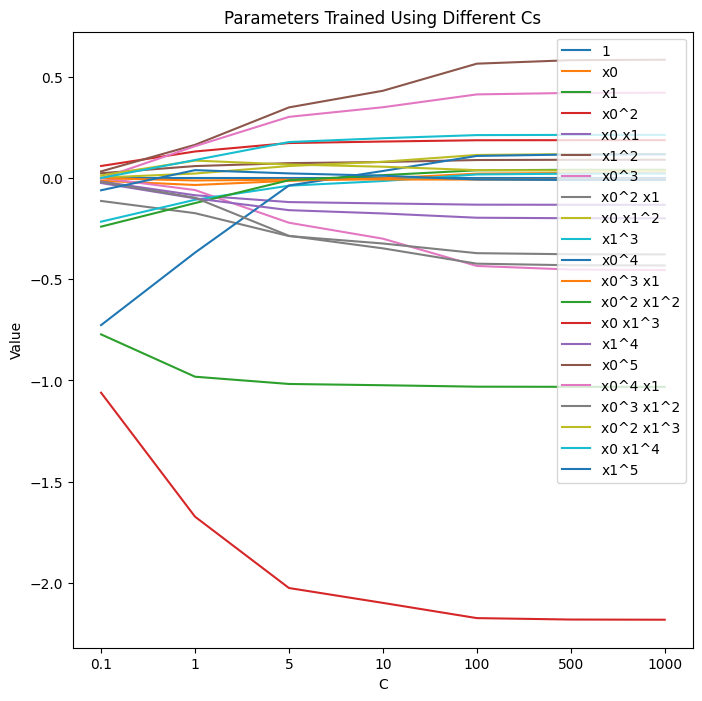

In [17]:
# Train a list of models, capture the parameters and predictions
parameters = []
predictions = []
c_list = [0.1, 1, 5, 10, 100, 500, 1000]
for c in c_list:
    # Transfer C to alpha
    alpha = 1/(2*c)
    clf = linear_model.Ridge(random_state=0, alpha=alpha)
    clf.fit(poly_X, y)
    parameters.append(clf.coef_)
    predictions.append(clf.predict(poly_Xtest))
    print("C is", c ,clf.coef_)
    
parameters = np.array(parameters).T

# Visualization (parameters)
plt.figure(figsize=[8, 8])
plt.title("Parameters Trained Using Different Cs")
for i in range(len(parameters)):
    plt.plot(np.arange(len(c_list)), parameters[i], label=names[i])
plt.xlabel("C")
plt.xticks(np.arange(len(c_list)), c_list)
plt.ylabel("Value")
plt.legend(loc='upper right')
plt.show()

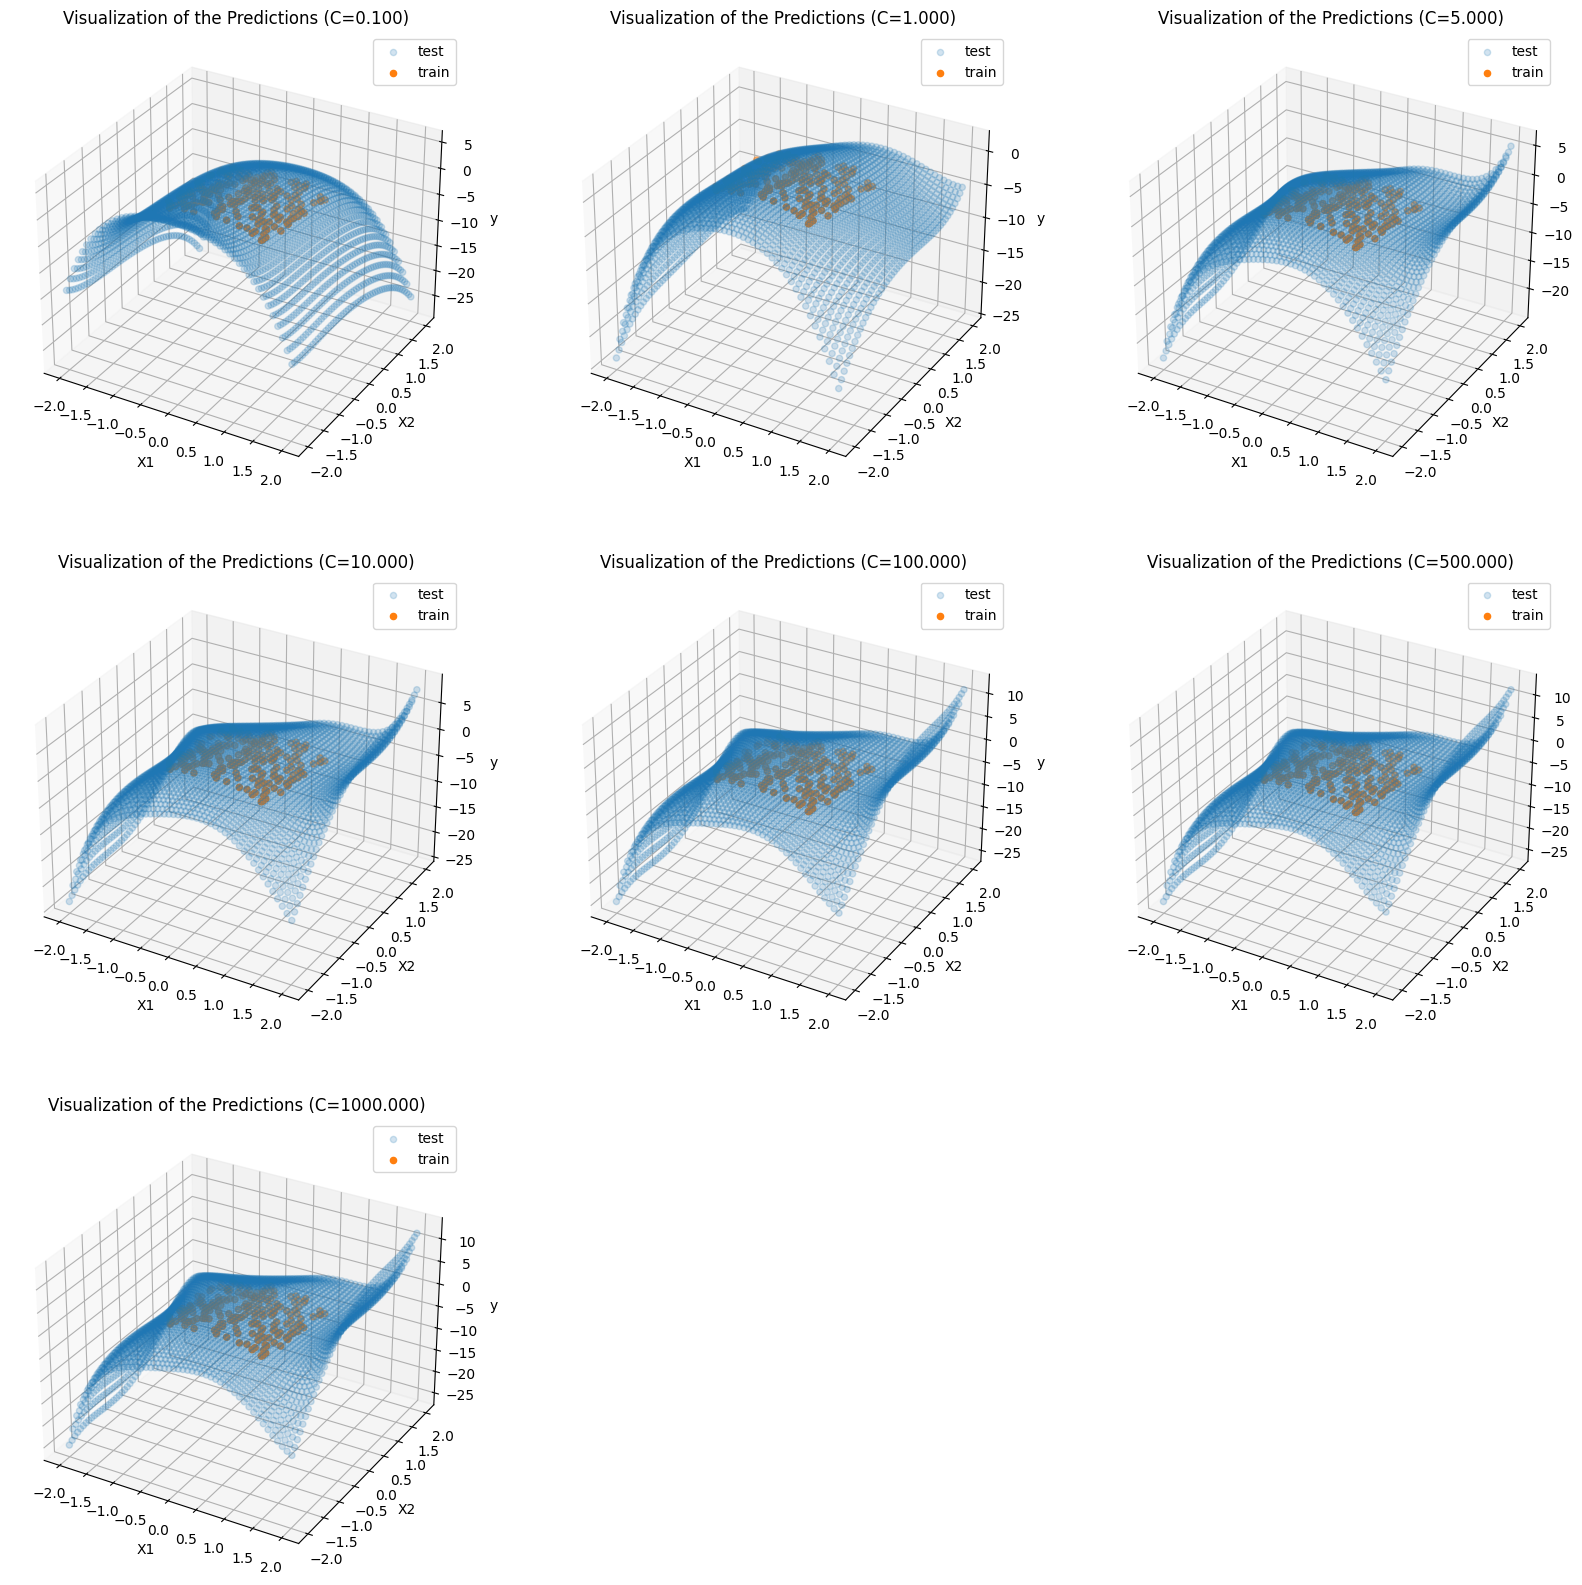

In [73]:
# Generate the graphs (predictions)
fig = plt.figure(figsize=[20, 20])
for i in range(len(c_list)):
    ax = fig.add_subplot(3, 3, i+1, projection ='3d')
    # Predictions
    ax.scatter(Xtest[:, 0], Xtest[:, 1], predictions[i], alpha=0.2, label="test")
    # Training samples
    ax.scatter(X[:, 0], X[:, 1], y, label="train")
    ax.set_title("Visualization of the Predictions (C=%.3f)"%c_list[i])
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("y")
    plt.legend()
plt.show()

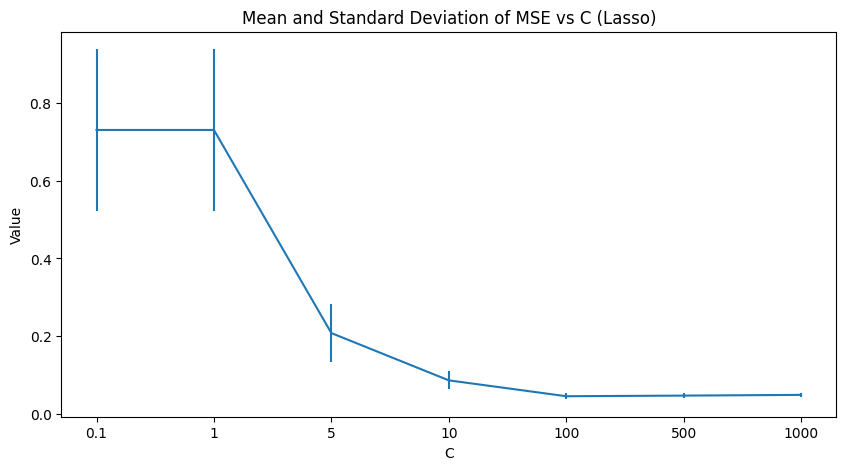

In [74]:
# A list of C
c_list = [0.1, 1, 5, 10, 100, 500, 1000]

# Create k folds
kf = KFold(5, shuffle=True, random_state=0)
datasets = [dataset for dataset in kf.split(poly_X)]

# Test on different Cs
means = []
stds = []
for c in c_list:
    alpha = 1/(2*c)
    model = linear_model.Lasso(random_state=0, alpha=alpha)
    errors = []
    for [train_indices, test_indices] in datasets:
        # Fit the model
        model.fit(poly_X[train_indices], y[train_indices])
        # Make predictions
        ypred = model.predict(poly_X[test_indices])
        # Calculate MSE
        errors.append(mean_squared_error(y[test_indices], ypred))
    means.append(np.array(errors).mean())
    stds.append(np.array(errors).std())
    
# Plot the graph
plt.figure(figsize=[10, 5])
plt.errorbar(np.arange(len(c_list)), means, stds)
plt.xticks(np.arange(len(c_list)), c_list)
plt.xlabel("C")
plt.ylabel("Value")
plt.title("Mean and Standard Deviation of MSE vs C (Lasso)")
plt.show()

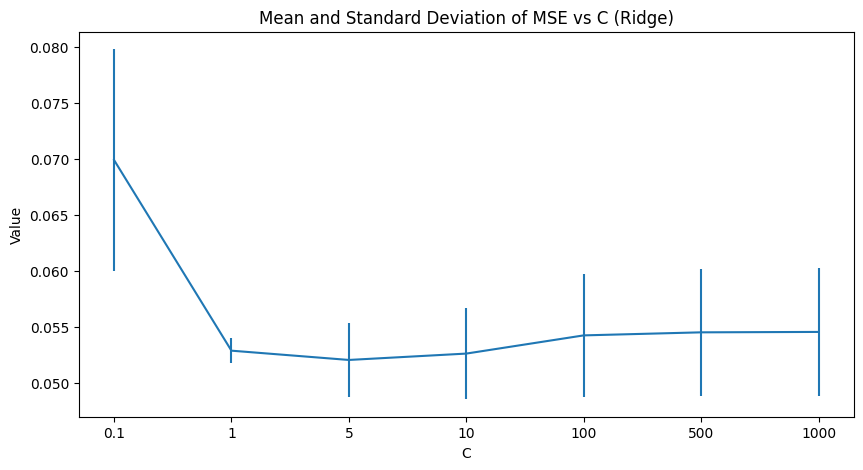

In [75]:
# A list of C
c_list = [0.1, 1, 5, 10, 100, 500, 1000]

# Create k folds
kf = KFold(5, shuffle=True, random_state=0)
datasets = [dataset for dataset in kf.split(poly_X)]

# Test on different Cs
means = []
stds = []
for c in c_list:
    alpha = 1/(2*c)
    model = linear_model.Ridge(random_state=0, alpha=alpha)
    errors = []
    for [train_indices, test_indices] in datasets:
        # Fit the model
        model.fit(poly_X[train_indices], y[train_indices])
        # Make predictions
        ypred = model.predict(poly_X[test_indices])
        # Calculate MSE
        errors.append(mean_squared_error(y[test_indices], ypred))
    means.append(np.array(errors).mean())
    stds.append(np.array(errors).std())
    
# Plot the graph
plt.figure(figsize=[10, 5])
plt.errorbar(np.arange(len(c_list)), means, stds)
plt.xticks(np.arange(len(c_list)), c_list)
plt.xlabel("C")
plt.ylabel("Value")
plt.title("Mean and Standard Deviation of MSE vs C (Ridge)")
plt.show()